<a href="https://colab.research.google.com/github/min290/projects_data_science/blob/main/HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import math

In [ ]:
data_path='/content/archive (4).zip'
file_to_load='data.csv'
import zipfile
with zipfile.ZipFile(data_path, 'r') as zip_ref:
  df=pd.read_csv(zip_ref.open(file_to_load))
  df.head()

In [ ]:
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [ ]:
df.describe().T

count           mean            std     min        25%  \
price          4600.0  551962.988473  563834.702547     0.0  322875.00   
bedrooms       4600.0       3.400870       0.908848     0.0       3.00   
bathrooms      4600.0       2.160815       0.783781     0.0       1.75   
sqft_living    4600.0    2139.346957     963.206916   370.0    1460.00   
sqft_lot       4600.0   14852.516087   35884.436145   638.0    5000.75   
floors         4600.0       1.512065       0.538288     1.0       1.00   
waterfront     4600.0       0.007174       0.084404     0.0       0.00   
view           4600.0       0.240652       0.778405     0.0       0.00   
condition      4600.0       3.451739       0.677230     1.0       3.00   
sqft_above     4600.0    1827.265435     862.168977   370.0    1190.00   
sqft_basement  4600.0     312.081522     464.137228     0.0       0.00   
yr_built       4600.0    1970.786304      29.731848  1900.0    1951.00   
yr_renovated   4600.0     808.608261     979.414536     0.0       0.00   

                         50%        75%         max  
price          460943.461539  654962.50  26590000.0  
bedrooms            3.000000       4.00         9.0  
bathrooms           2.250000       2.50         8.0  
sqft_living      1980.000000    2620.00     13540.0  
sqft_lot         7683.000000   11001.25   1074218.0  
floors              1.500000       2.00         3.5  
waterfront          0.000000       0.00         1.0  
view                0.000000       0.00         4.0  
condition           3.000000       4.00         5.0  
sqft_above       1590.000000    2300.00      9410.0  
sqft_basement       0.000000     610.00      4820.0  
yr_built         1976.000000    1997.00      2014.0  
yr_renovated        0.000000    1999.00      2014.0

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
numeric_feature=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print("we have {} numeric features:{}".format(len(numeric_feature),numeric_feature))
print("we have {} categorical features:{}".format(len(categorical_feature),categorical_feature))

we have 13 numeric features:['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
we have 5 categorical features:['date', 'street', 'city', 'statezip', 'country']


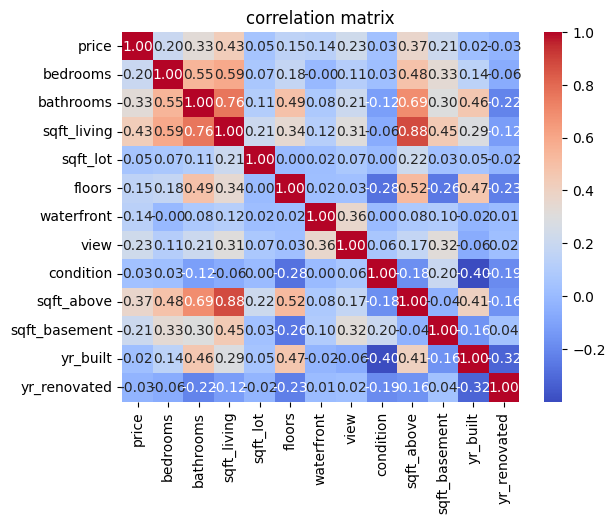

In [ ]:
numeric_data=df.select_dtypes(include=['int64','float64'])
correlation_matrix=numeric_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('correlation matrix')
plt.show()


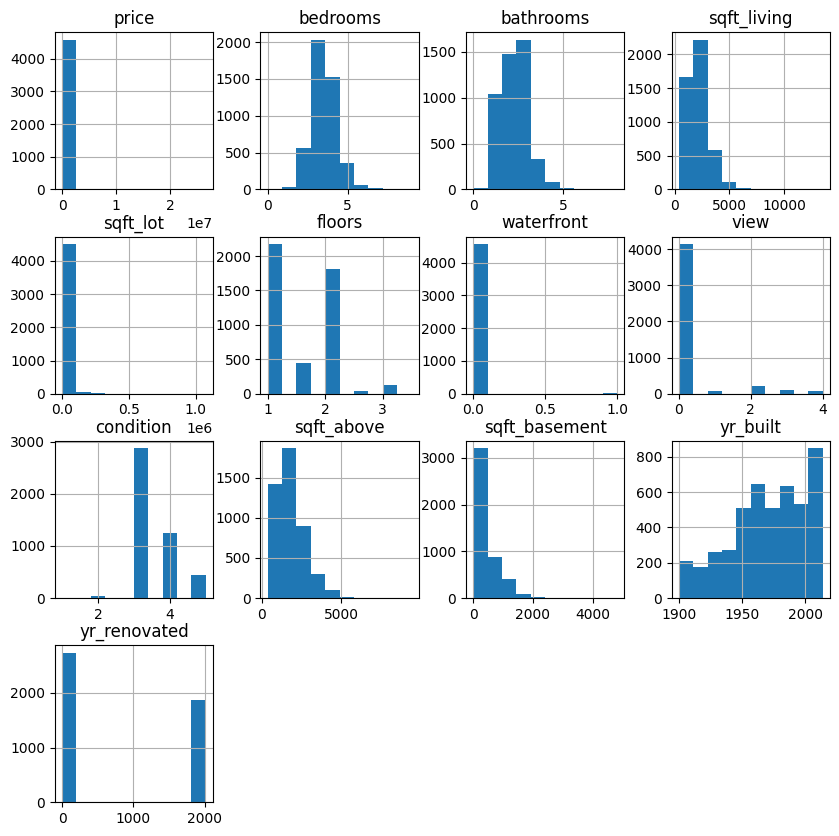

In [ ]:
df.hist(figsize=(10,10))
plt.show()

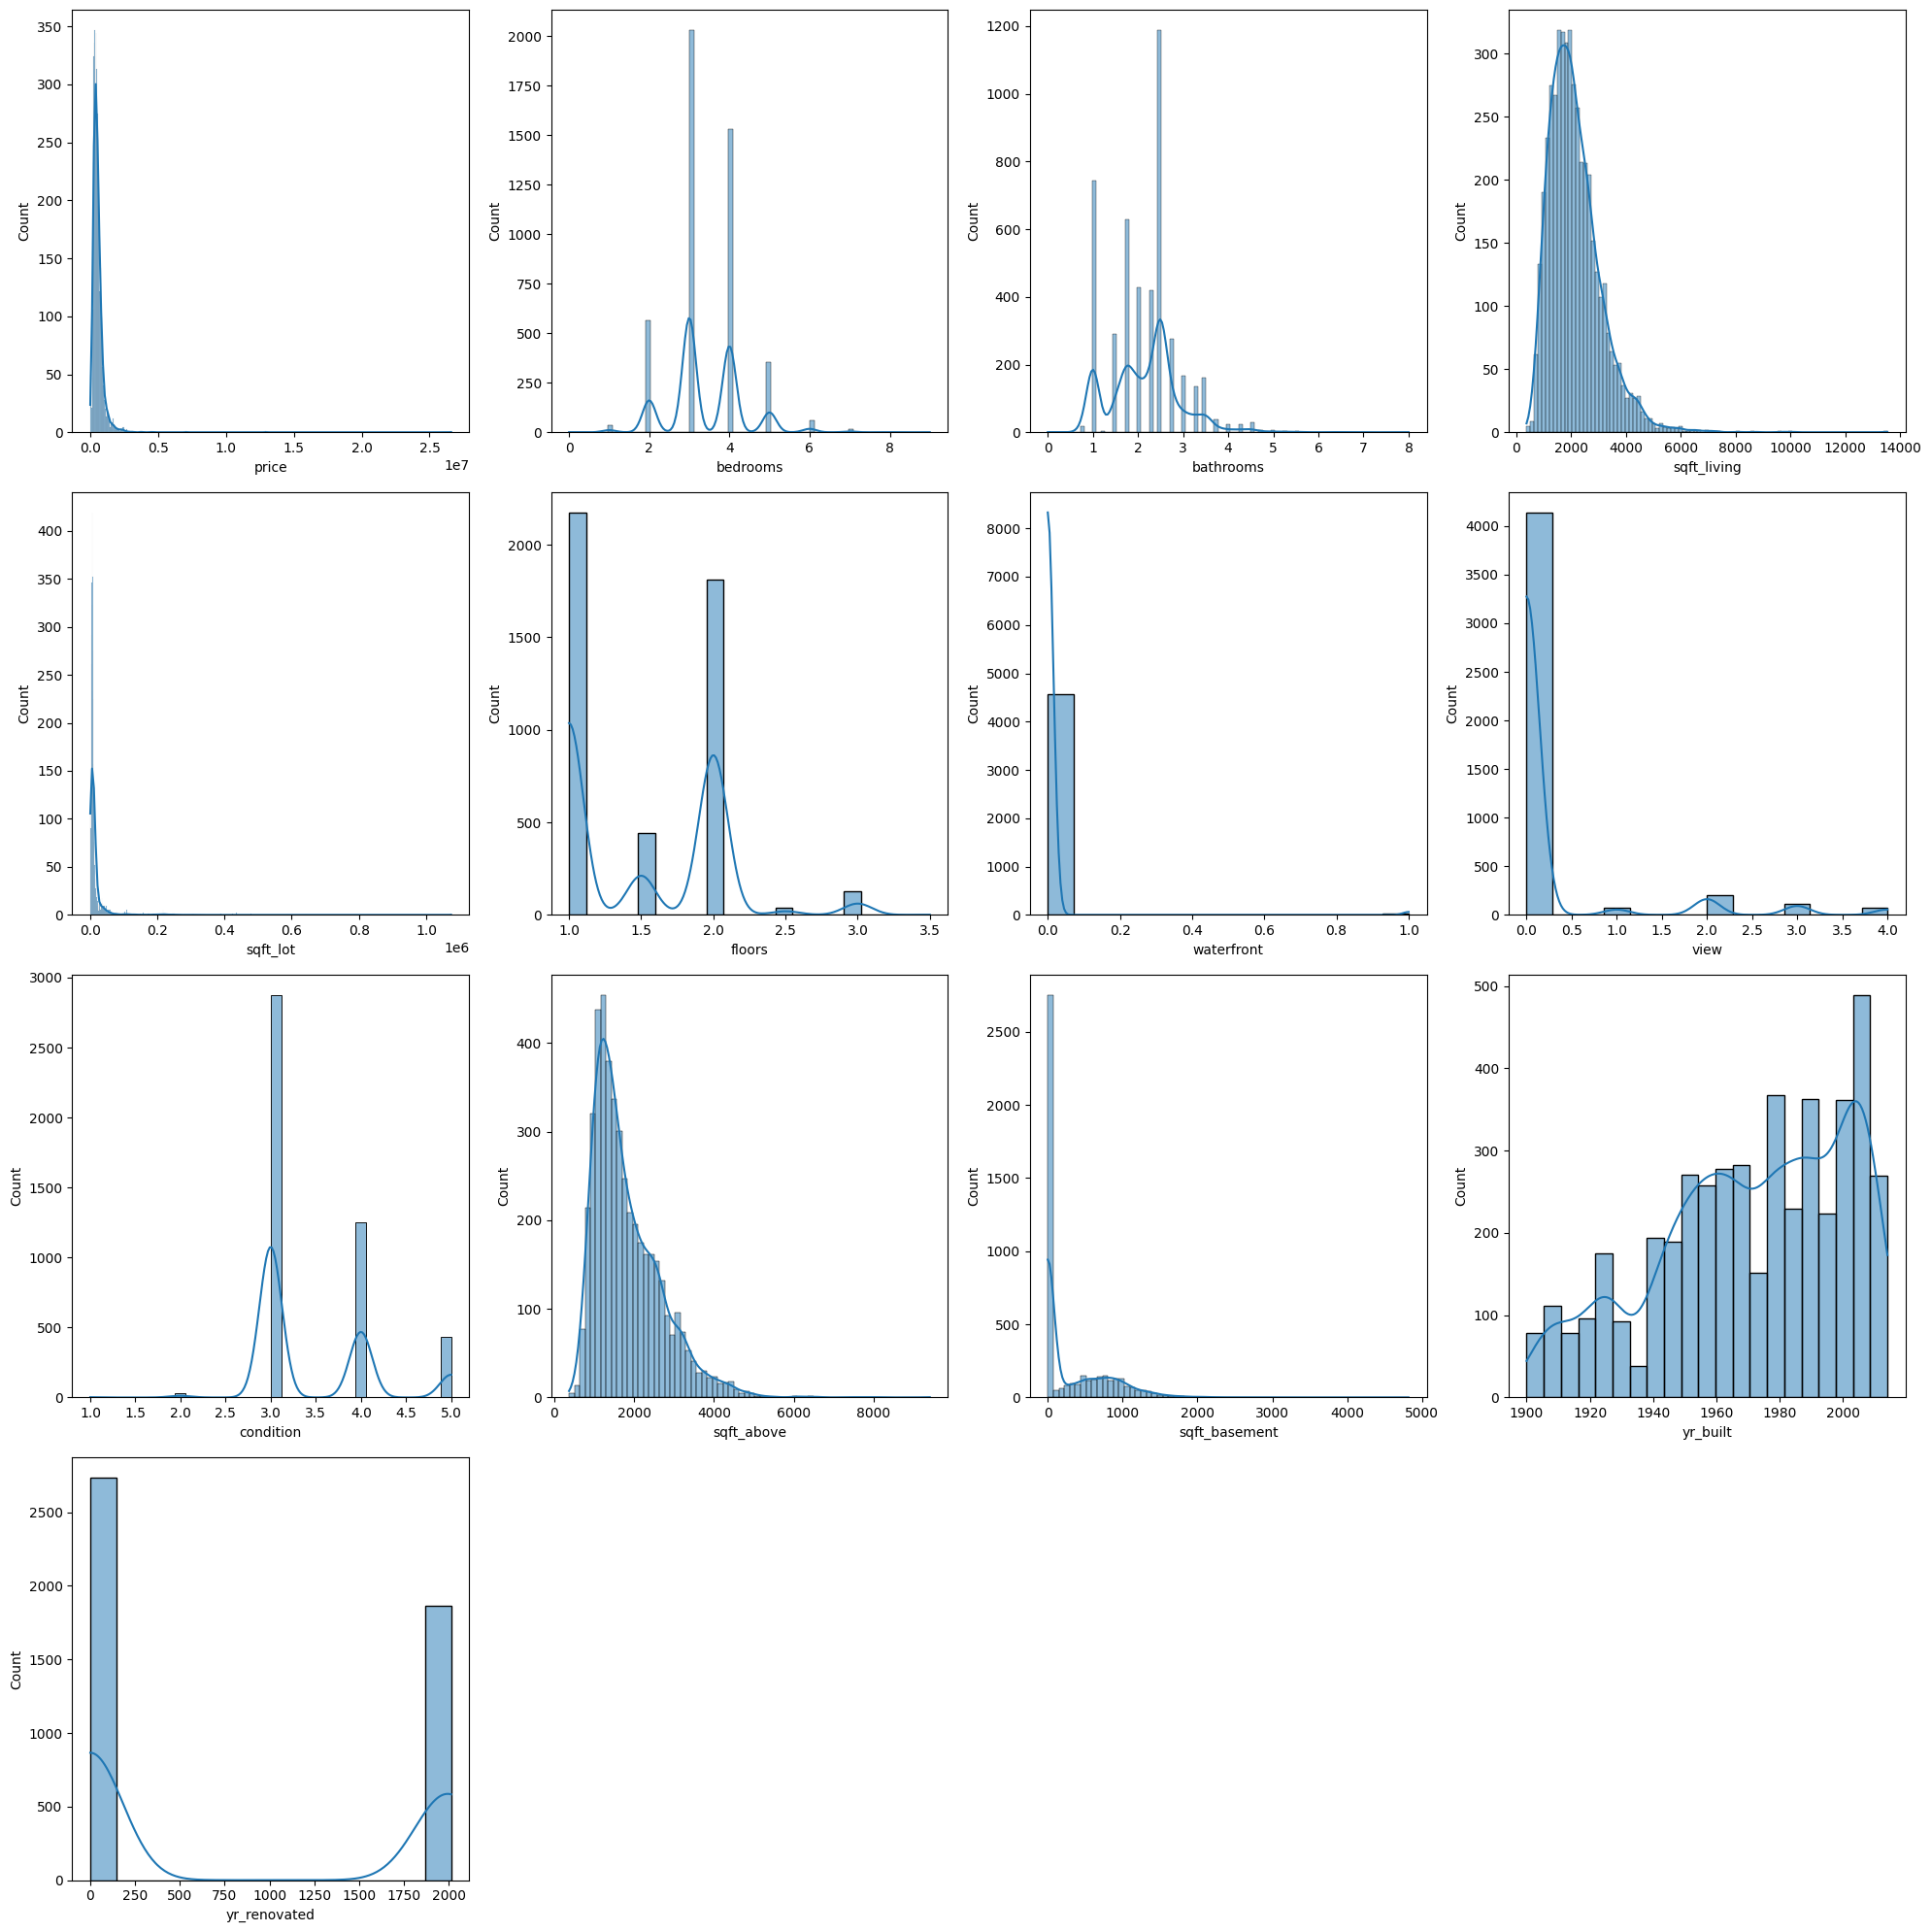

In [ ]:
n_cols=4
n_rows=math.ceil(len(numeric_feature)/n_cols)
fig,axes=plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,20))
axes=axes.flatten()
for i, column in enumerate(numeric_feature):
  sns.histplot(data=df,x=column,kde=True,ax=axes[i])
for j in range(len(numeric_feature),len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

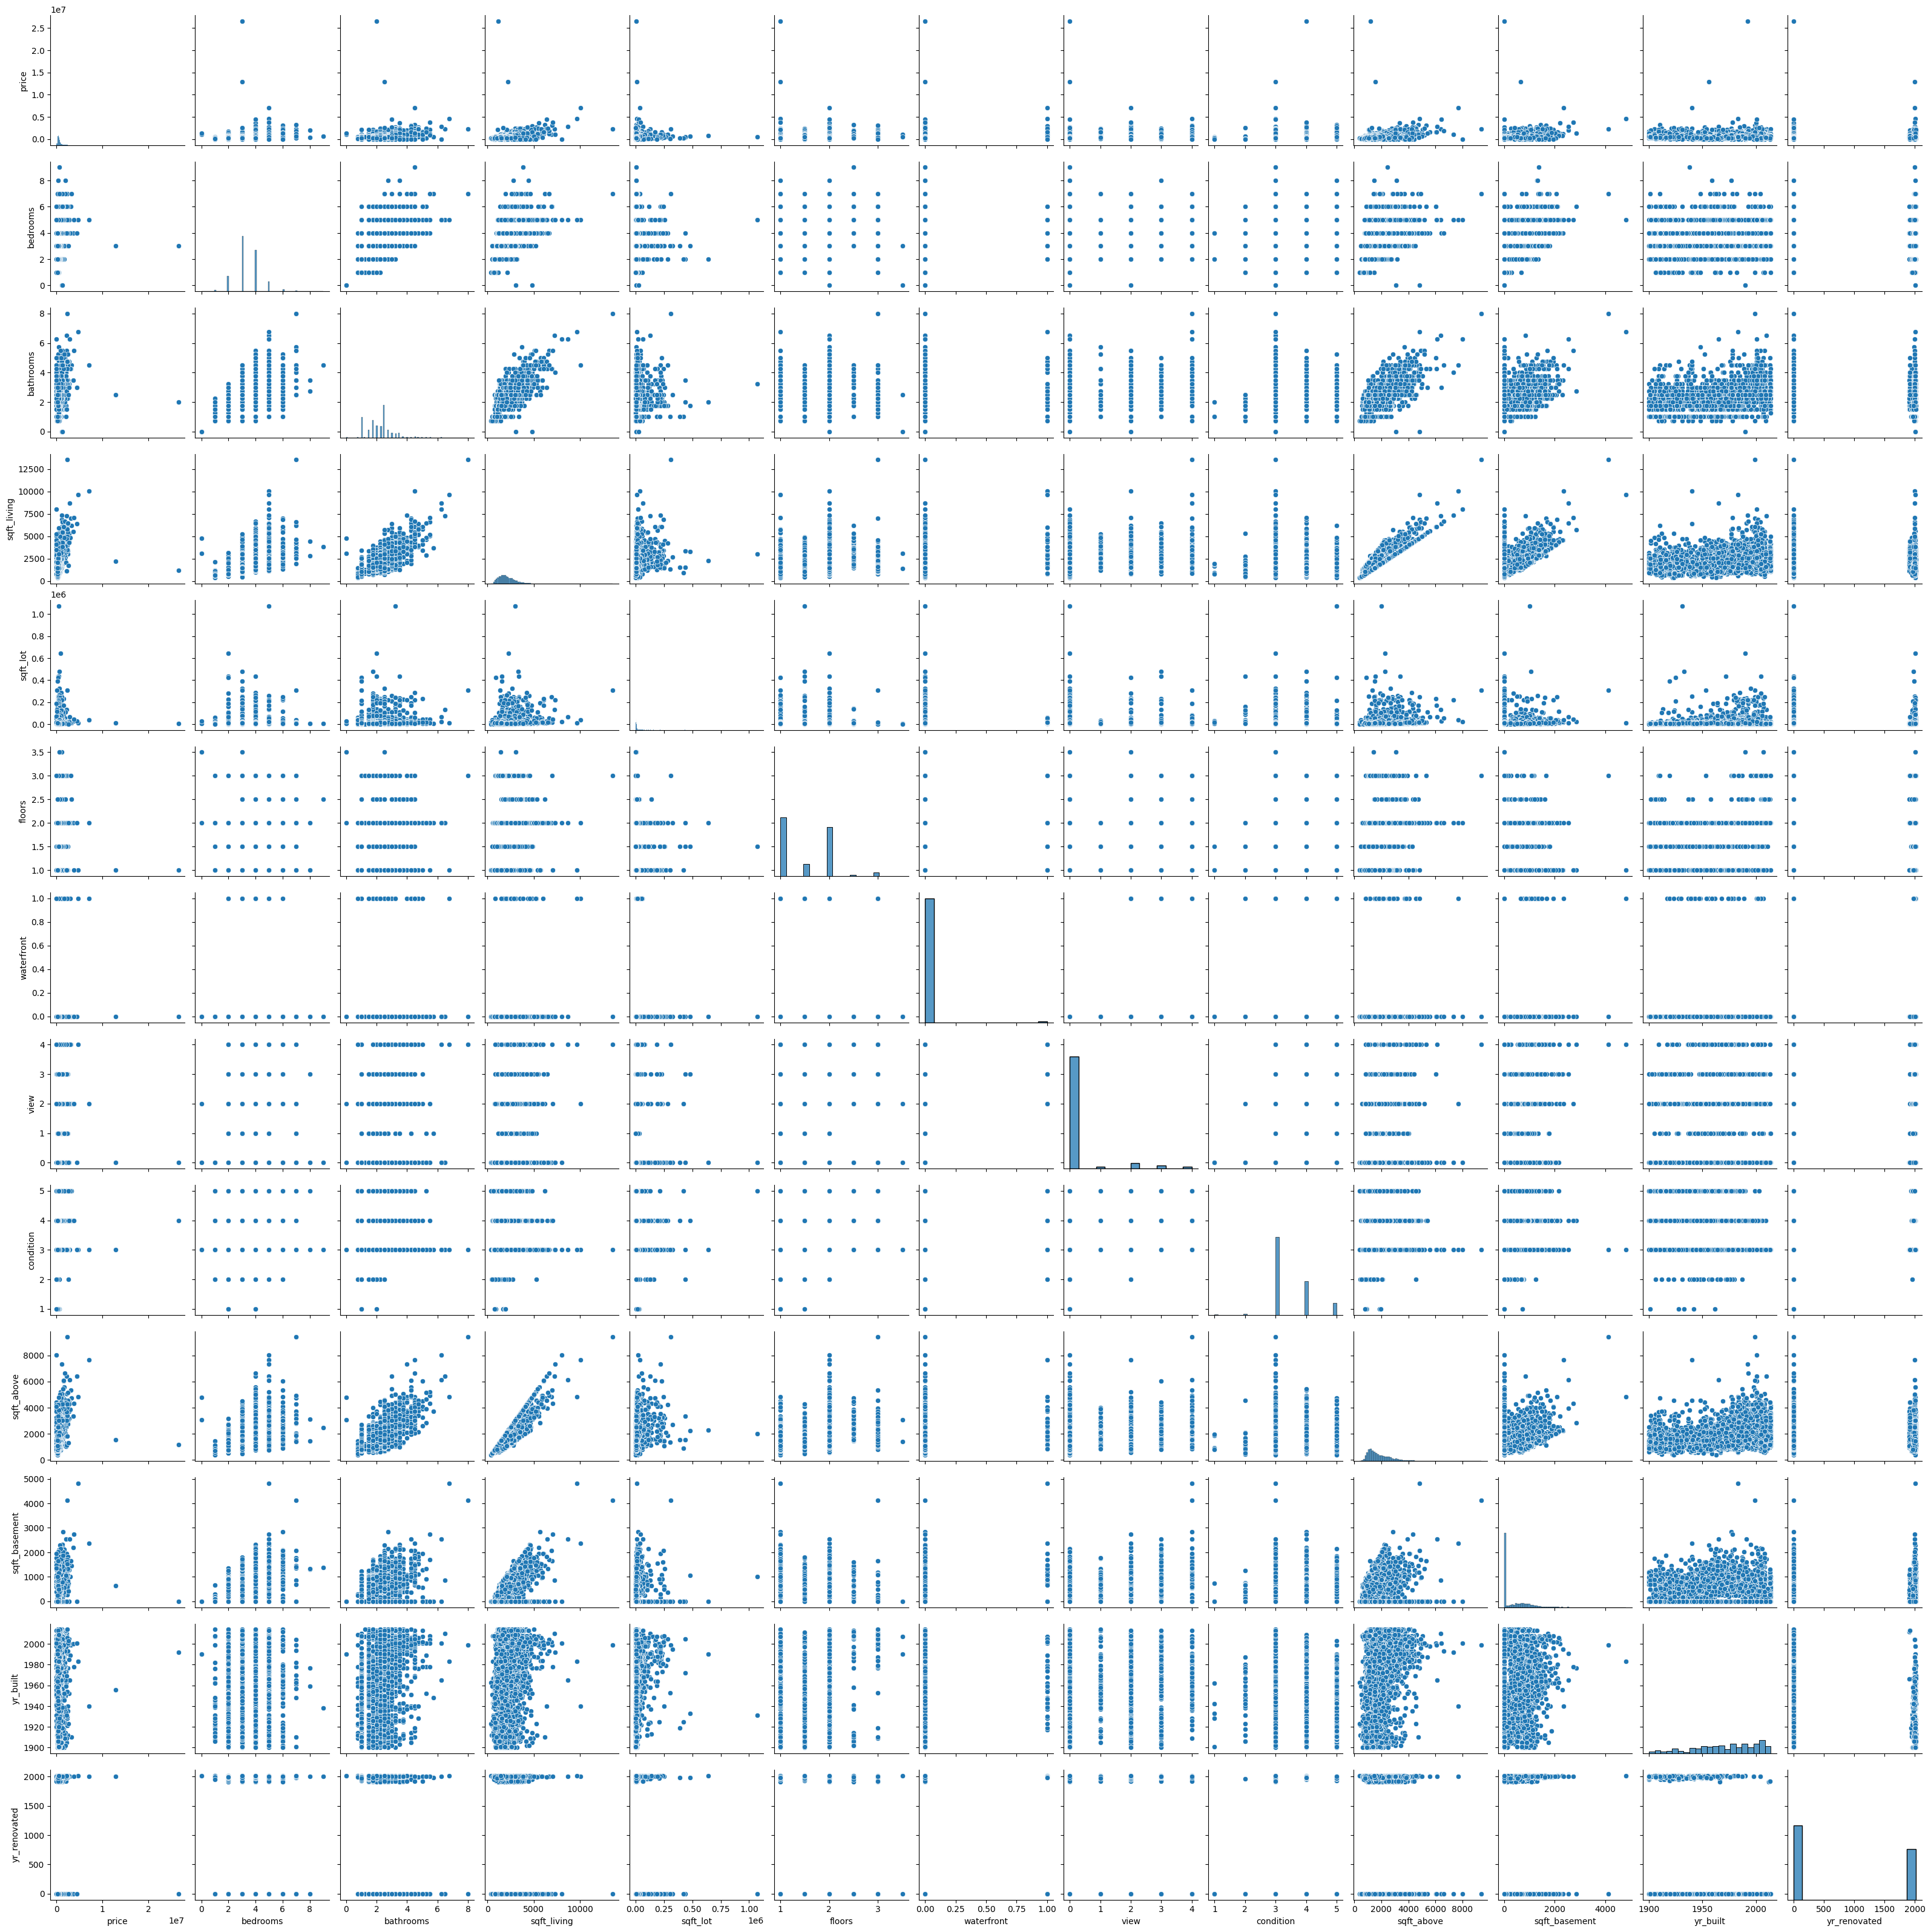

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

In [ ]:
df.city.value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific                   6
Algona                    5
Yarrow Point              4
Skykomish                 3
Preston                   2
Milton                    2
Inglewood-Finn Hill       1
Snoqualmie Pass           1
Beaux Arts Village        1
Name: count, dtype: int64

In [ ]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [ ]:
df.groupby('city')[['price']].sum()


price
city                             
Algona               1.036440e+06
Auburn               5.268392e+07
Beaux Arts Village   7.450000e+05
Bellevue             2.422937e+08
Black Diamond        3.056450e+06
Bothell              1.588758e+07
Burien               2.582210e+07
Carnation            1.119254e+07
Clyde Hill           1.454140e+07
Covington            1.273791e+07
Des Moines           1.768957e+07
Duvall               1.696775e+07
Enumclaw             8.613208e+06
Fall City            7.619500e+06
Federal Way          4.290338e+07
Inglewood-Finn Hill  4.250000e+05
Issaquah             1.114826e+08
Kenmore              2.953461e+07
Kent                 8.130610e+07
Kirkland             1.218461e+08
Lake Forest Park     1.614510e+07
Maple Valley         3.230159e+07
Medina               2.251215e+07
Mercer Island        9.664832e+07
Milton               5.700000e+05
Newcastle            2.197954e+07
Normandy Park        9.122275e+06
North Bend           1.997829e+07
Pacific              1.351400e+06
Preston              1.124900e+06
Ravensdale           3.598500e+06
Redmond              1.568976e+08
Renton               1.104730e+08
Sammamish            1.202106e+08
SeaTac               7.113428e+06
Seattle              9.120843e+08
Shoreline            5.170826e+07
Skykomish            6.990000e+05
Snoqualmie           3.807768e+07
Snoqualmie Pass      5.250000e+05
Tukwila              8.940412e+06
Vashon               1.370415e+07
Woodinville          7.009998e+07
Yarrow Point         4.779350e+06

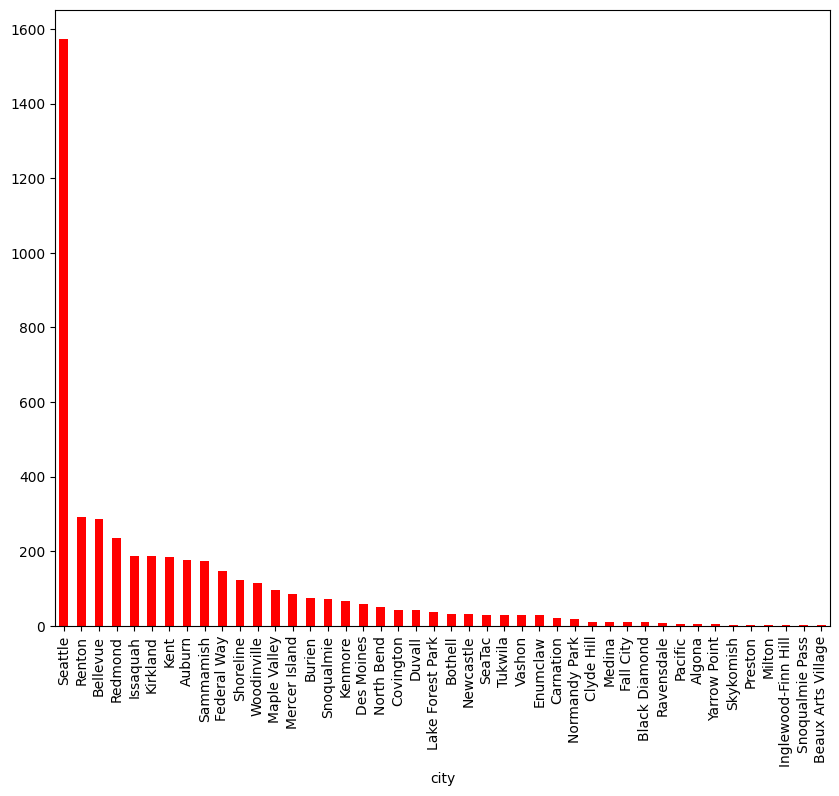

In [ ]:
df.city.value_counts().plot(kind='bar',figsize=(10,8),color='red')
plt.show()

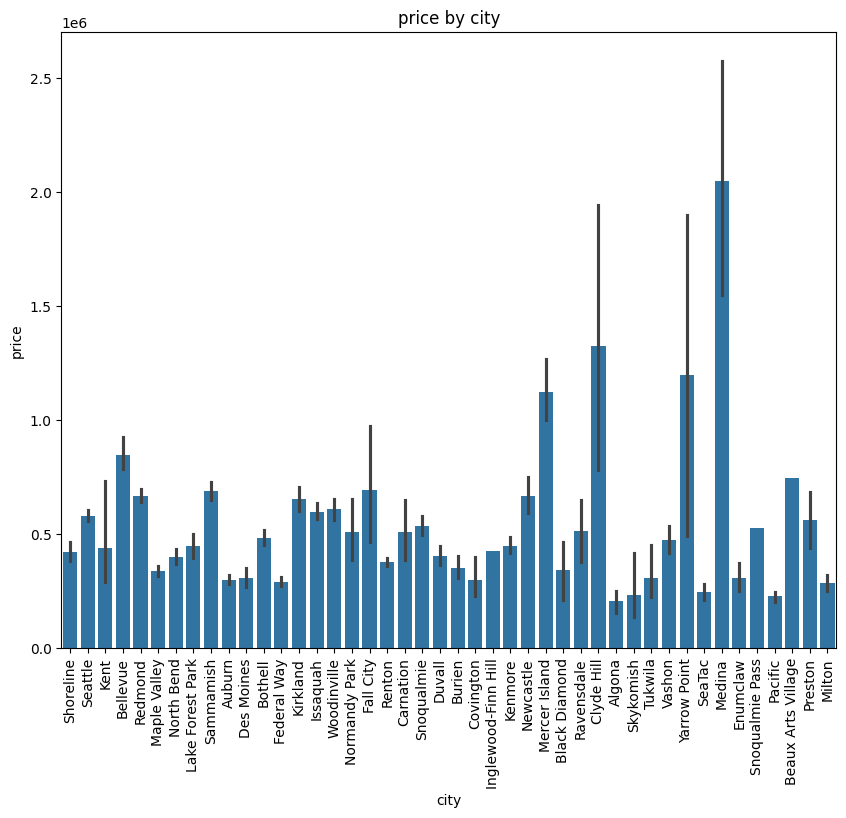

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['city'],y=df.price)
plt.xticks(rotation=90,fontsize=10)
plt.title('price by city')
plt.show()

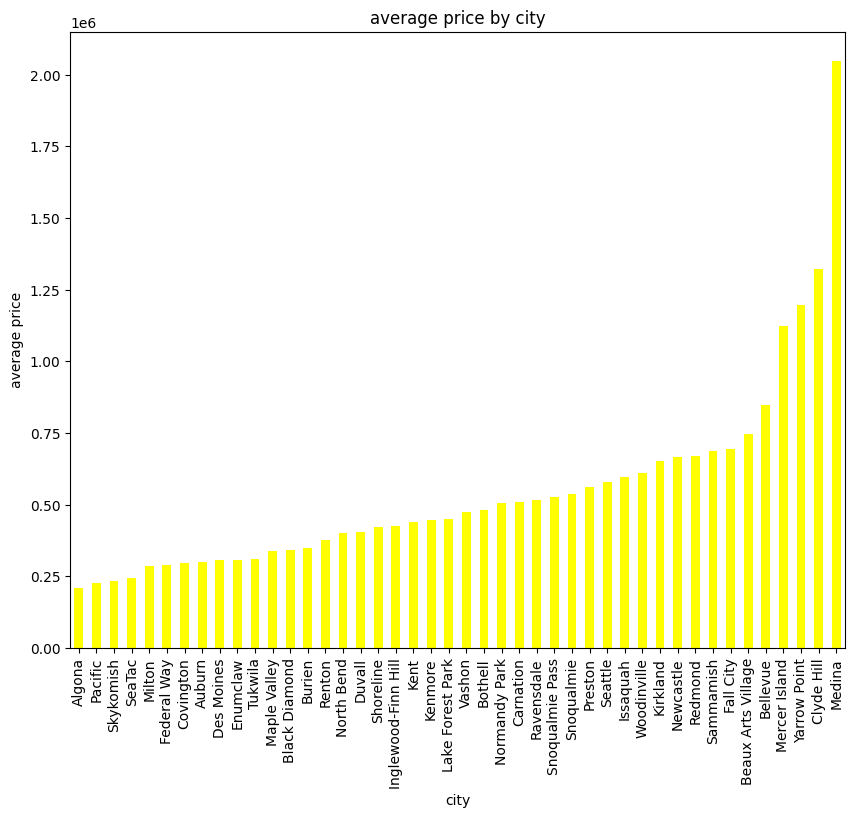

In [ ]:
avg_price=df.groupby('city')['price'].mean().sort_values()
plt.figure(figsize=(10,8))
avg_price.plot(kind='bar',color='yellow')
plt.xticks(rotation=90,fontsize=10)
plt.title('average price by city')
plt.xlabel('city')
plt.ylabel('average price')
plt.show()

In [ ]:
df.street.value_counts()

street
2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: count, Length: 4525, dtype: int64

In [ ]:
df.groupby('street')['price'].sum()

street
1 View Ln NE           309620.0
10 W Etruria St        625000.0
100 20th Ave E         600000.0
100 24th Ave E         460000.0
100 Mt Si Pl NW        575000.0
                         ...   
Shangri-La Way NW      627000.0
Sunrise Loop Trail     754800.0
Tolt Pipeline Trail    435000.0
Trossachs Blvd SE      735000.0
Valley View Trail      693000.0
Name: price, Length: 4525, dtype: float64

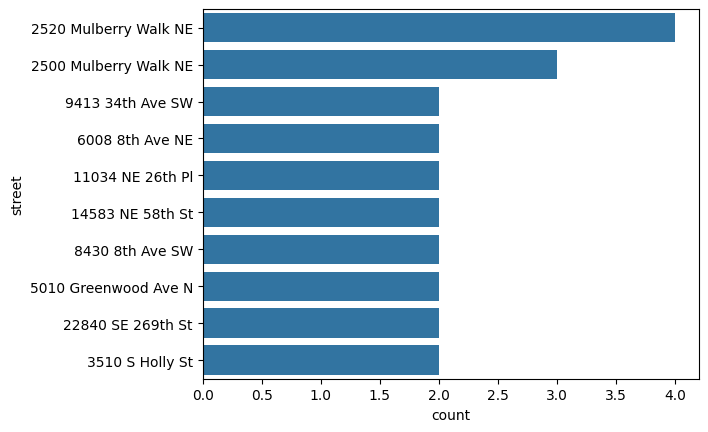

In [ ]:
top_10_street = df['street'].value_counts().head(10)
sns.barplot(x = top_10_street, y=top_10_street.index)
plt.show()

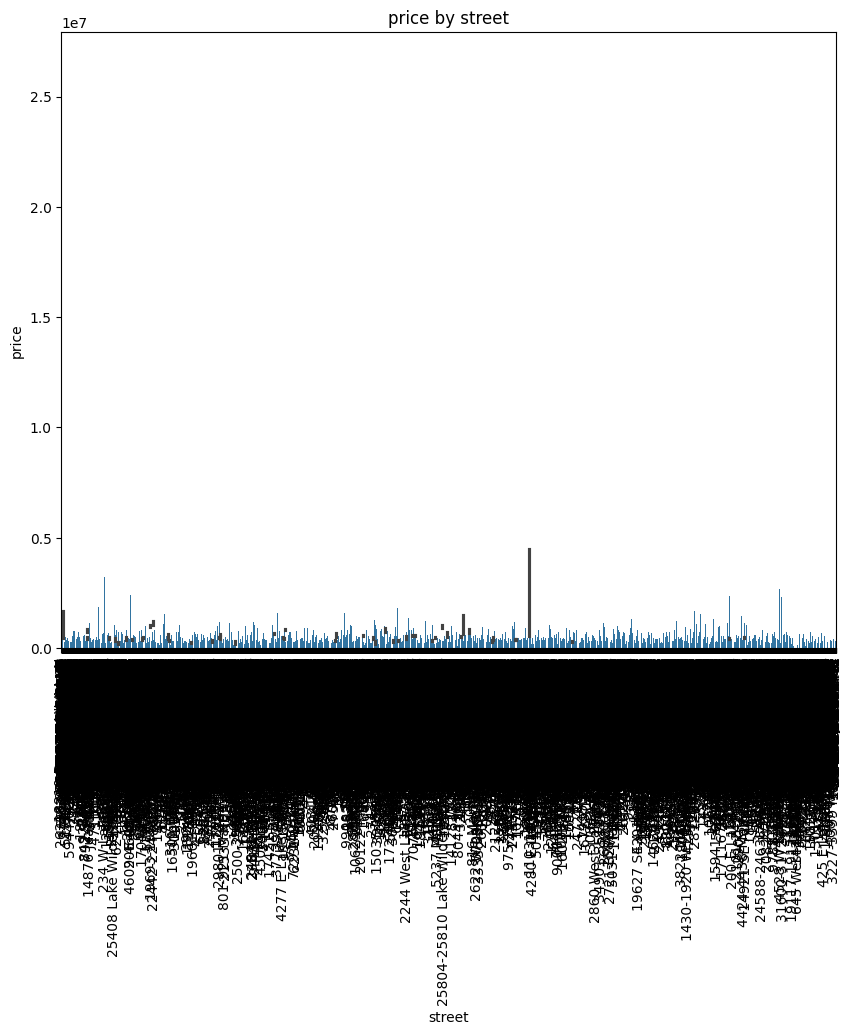

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['street'],y=df.price)
plt.xticks(rotation=90,fontsize=10)
plt.title('price by street')
plt.xlabel('street')
plt.ylabel('price')
plt.show()

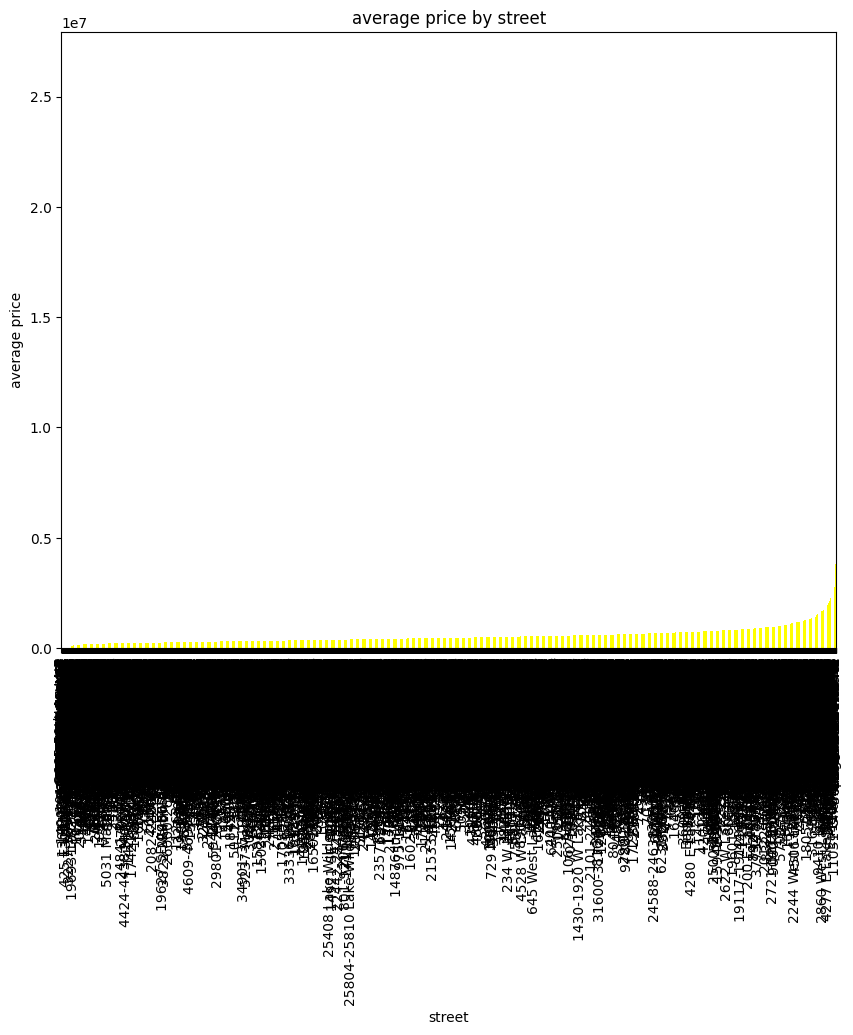

In [ ]:
avg_price=df.groupby('street')['price'].mean().sort_values()
plt.figure(figsize=(10,8))
avg_price.plot(kind='bar',color='yellow')
plt.xticks(rotation=90,fontsize=10)
plt.title('average price by street')
plt.xlabel('street')
plt.ylabel('average price')
plt.show()

In [ ]:

df.statezip.value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [ ]:
df.groupby('statezip')['price'].sum()

statezip
WA 98001    1.726823e+07
WA 98002    8.047703e+06
WA 98003    1.437243e+07
WA 98004    9.746585e+07
WA 98005    2.258460e+07
                ...     
WA 98188    6.025778e+06
WA 98198    1.723537e+07
WA 98199    6.413479e+07
WA 98288    6.990000e+05
WA 98354    5.700000e+05
Name: price, Length: 77, dtype: float64

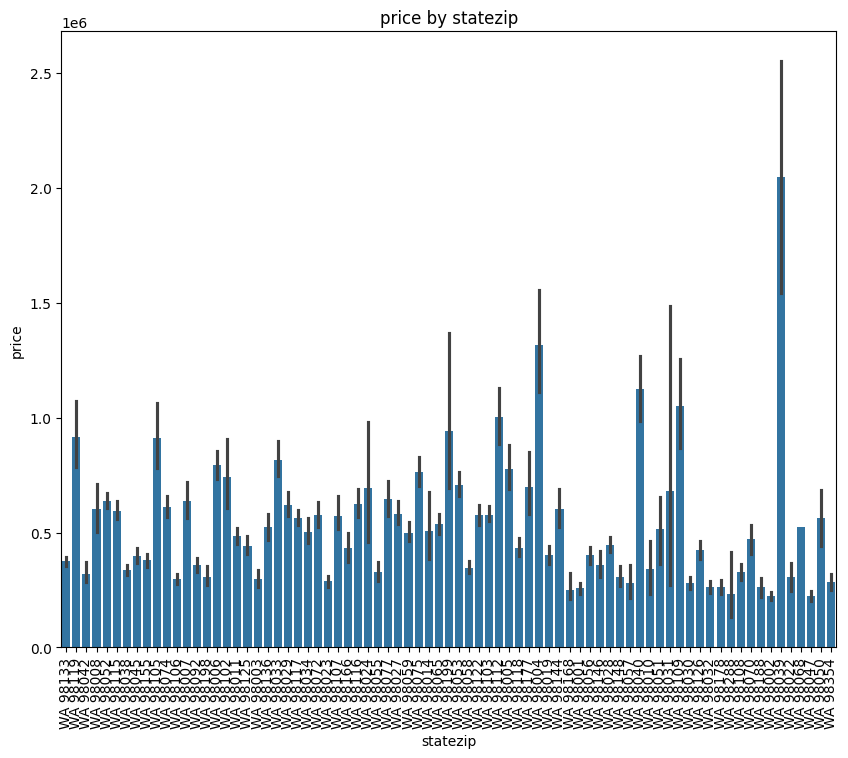

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['statezip'],y=df.price)
plt.xticks(rotation=90,fontsize=10)
plt.title('price by statezip')
plt.xlabel('statezip')
plt.ylabel('price')
plt.show()

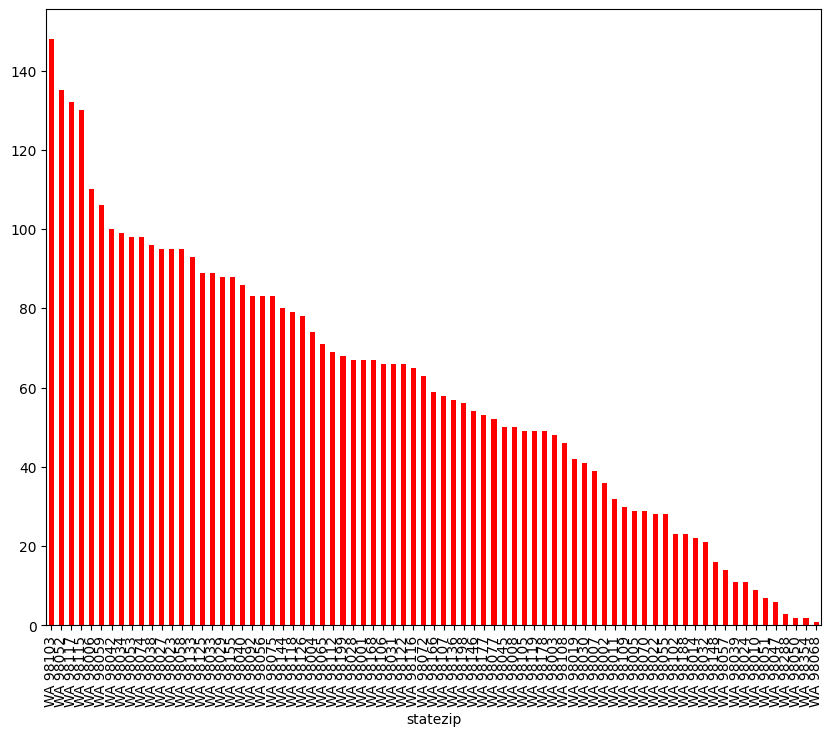

In [ ]:
df.statezip.value_counts().plot(kind='bar',figsize=(10,8),color='red')
plt.show()

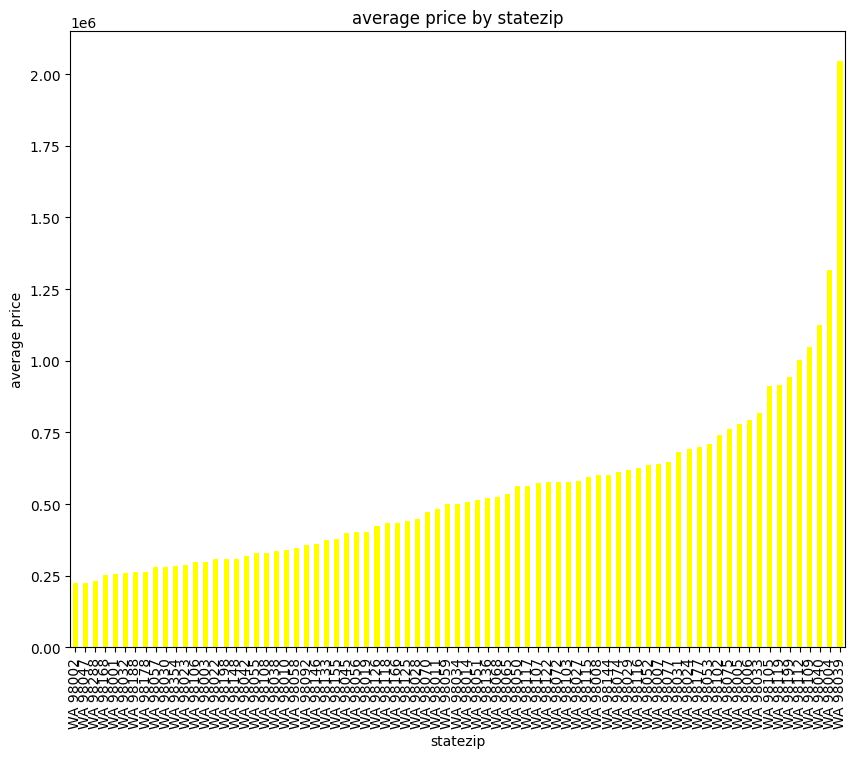

In [ ]:
avg_price=df.groupby('statezip')['price'].mean().sort_values()
plt.figure(figsize=(10,8))
avg_price.plot(kind='bar',color='yellow')
plt.xticks(rotation=90,fontsize=10)
plt.title('average price by statezip')
plt.xlabel('statezip')
plt.ylabel('average price')
plt.show()

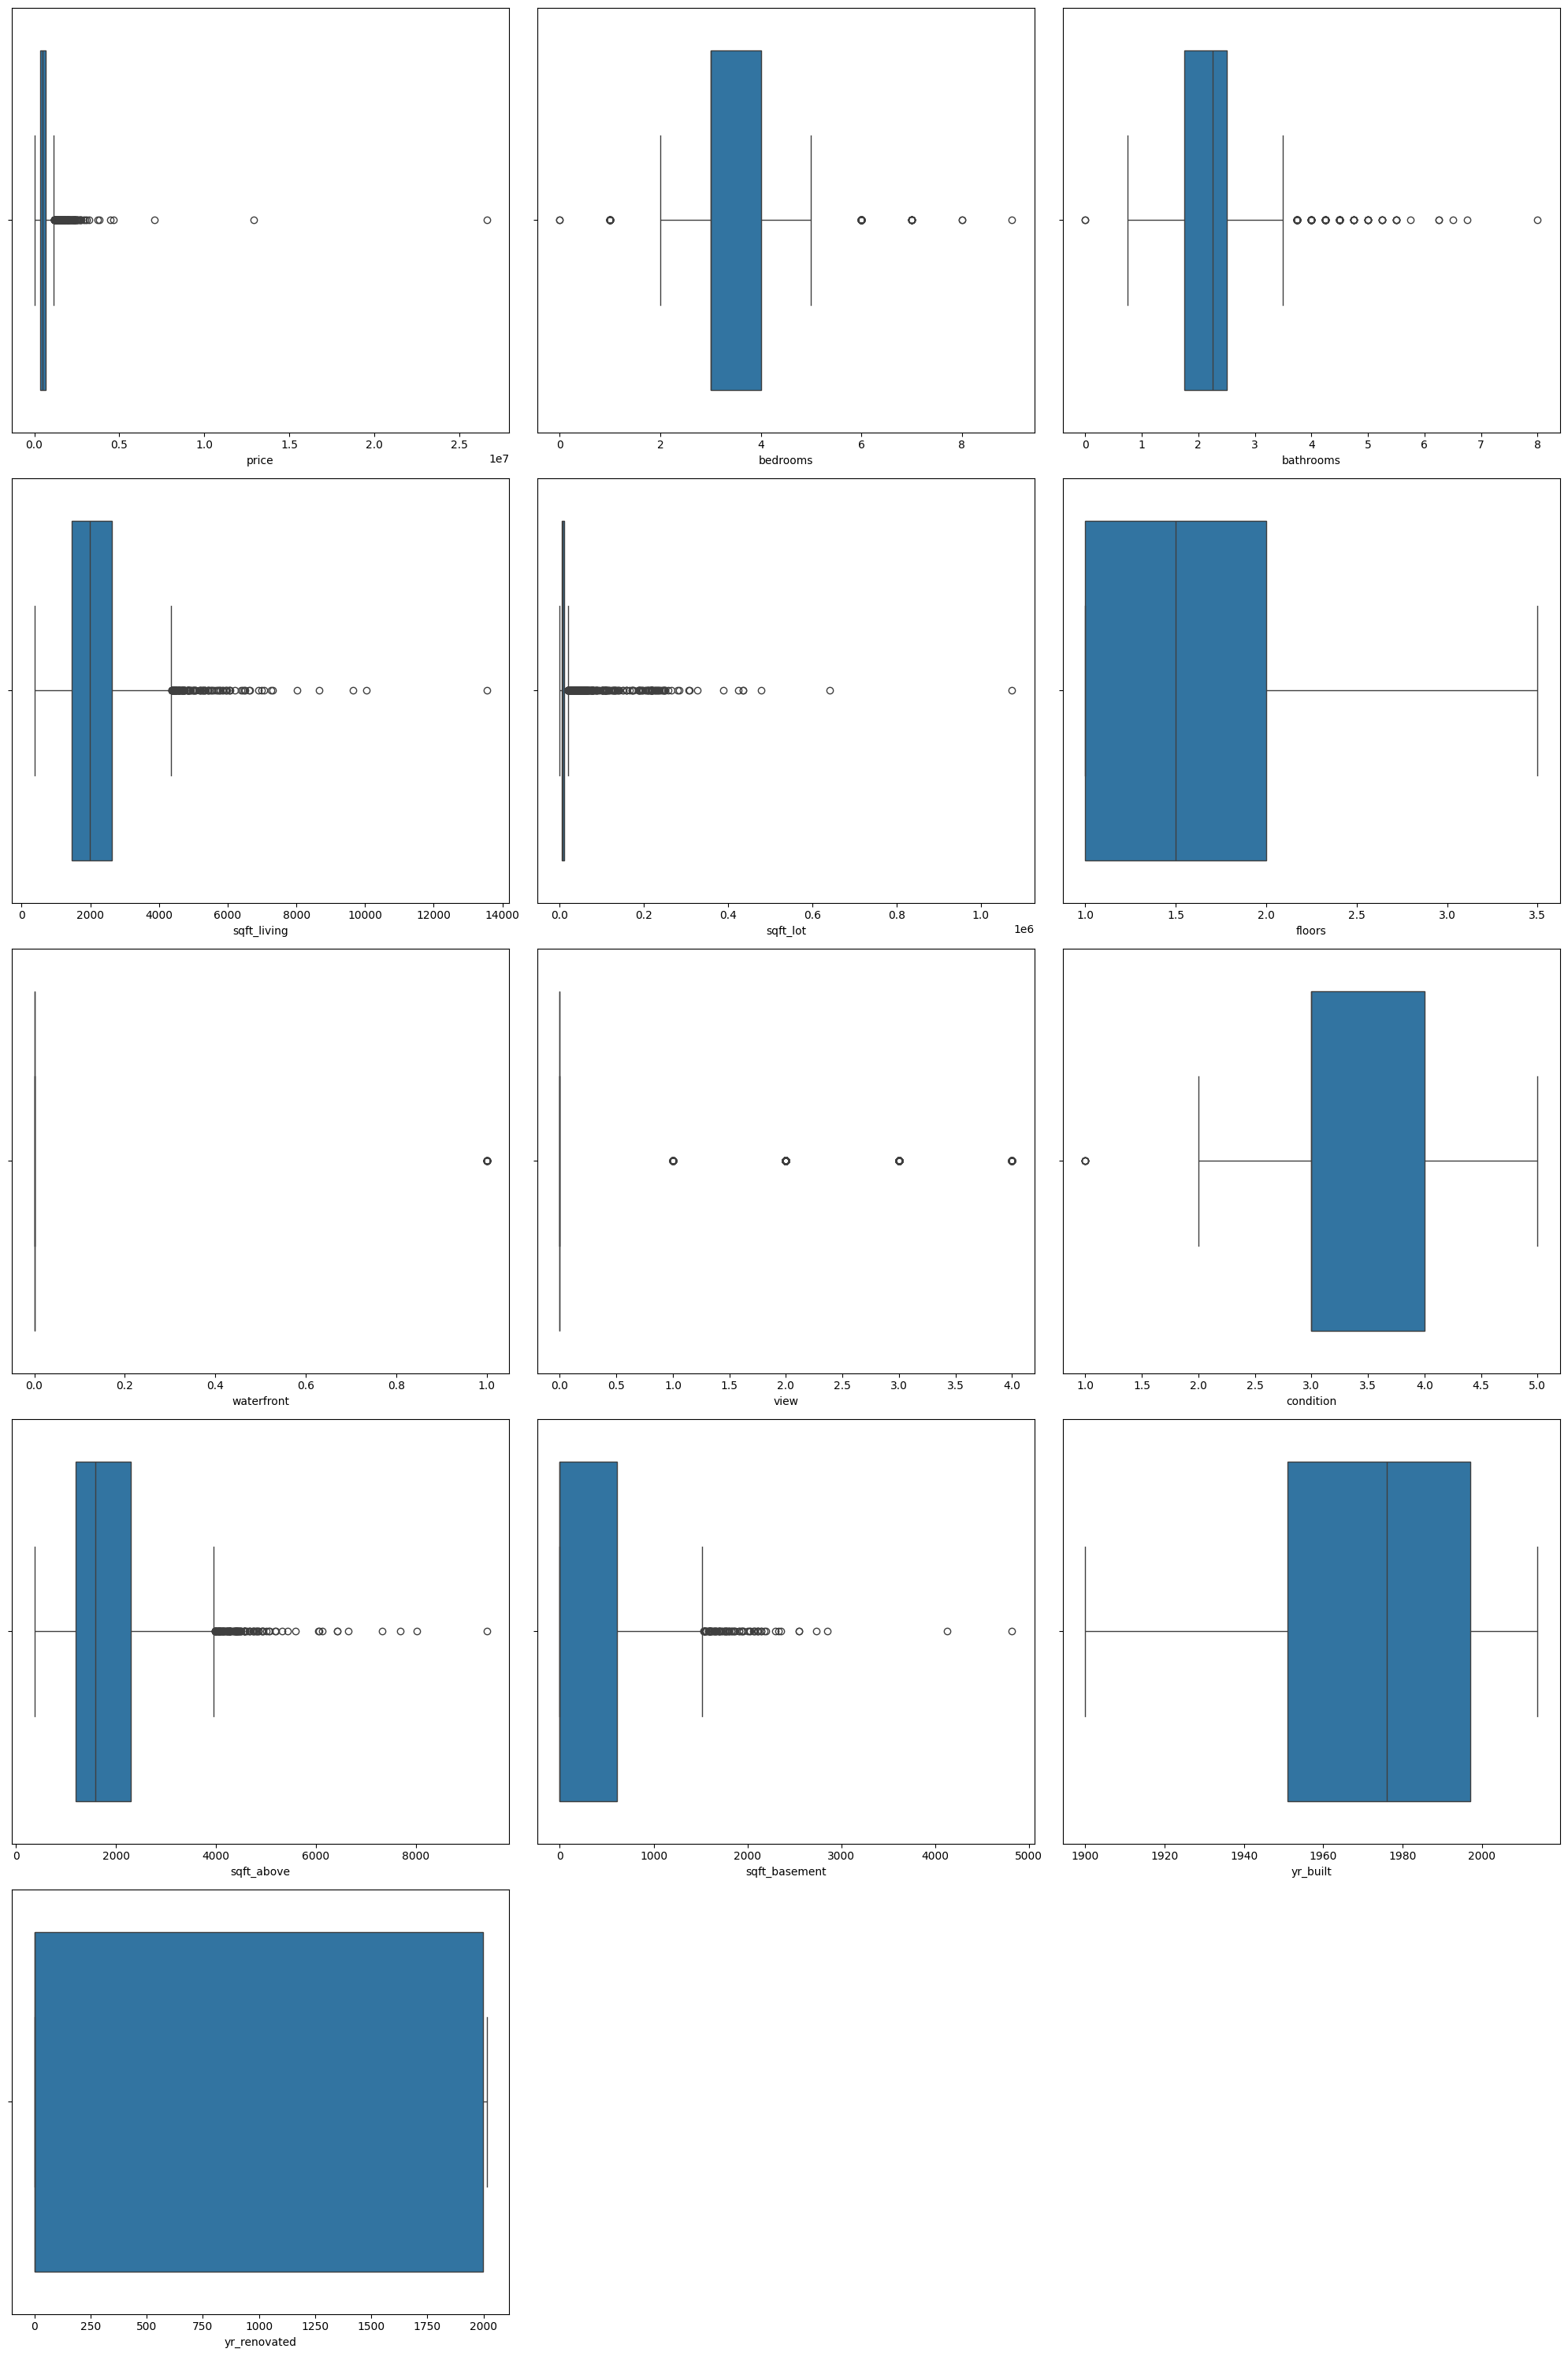

In [ ]:
numeric_data=df.select_dtypes(include=['int64','float64'])
numeric_column=len(numeric_data.columns)
n_cols=3
n_rows=math.ceil(numeric_column/n_cols)
fig,axes=plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,30))
axes=axes.flatten()
for i, column in enumerate(numeric_feature):
  sns.boxplot(data=df,x=column,ax=axes[i])
axes[i].set_xlabel(column)
for j in range(i+1,len(axes)):
  axes[j].axis('off')
plt.tight_layout()
plt.show()

**CHECKING** **OUTLIERS**

<ipython-input-33-698d0c608145>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='red',kde=True)
<ipython-input-33-698d0c608145>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='red',kde=True)
<ipython-input-33-698d0c608145>:7: UserWarning: 

`distplot` is a de

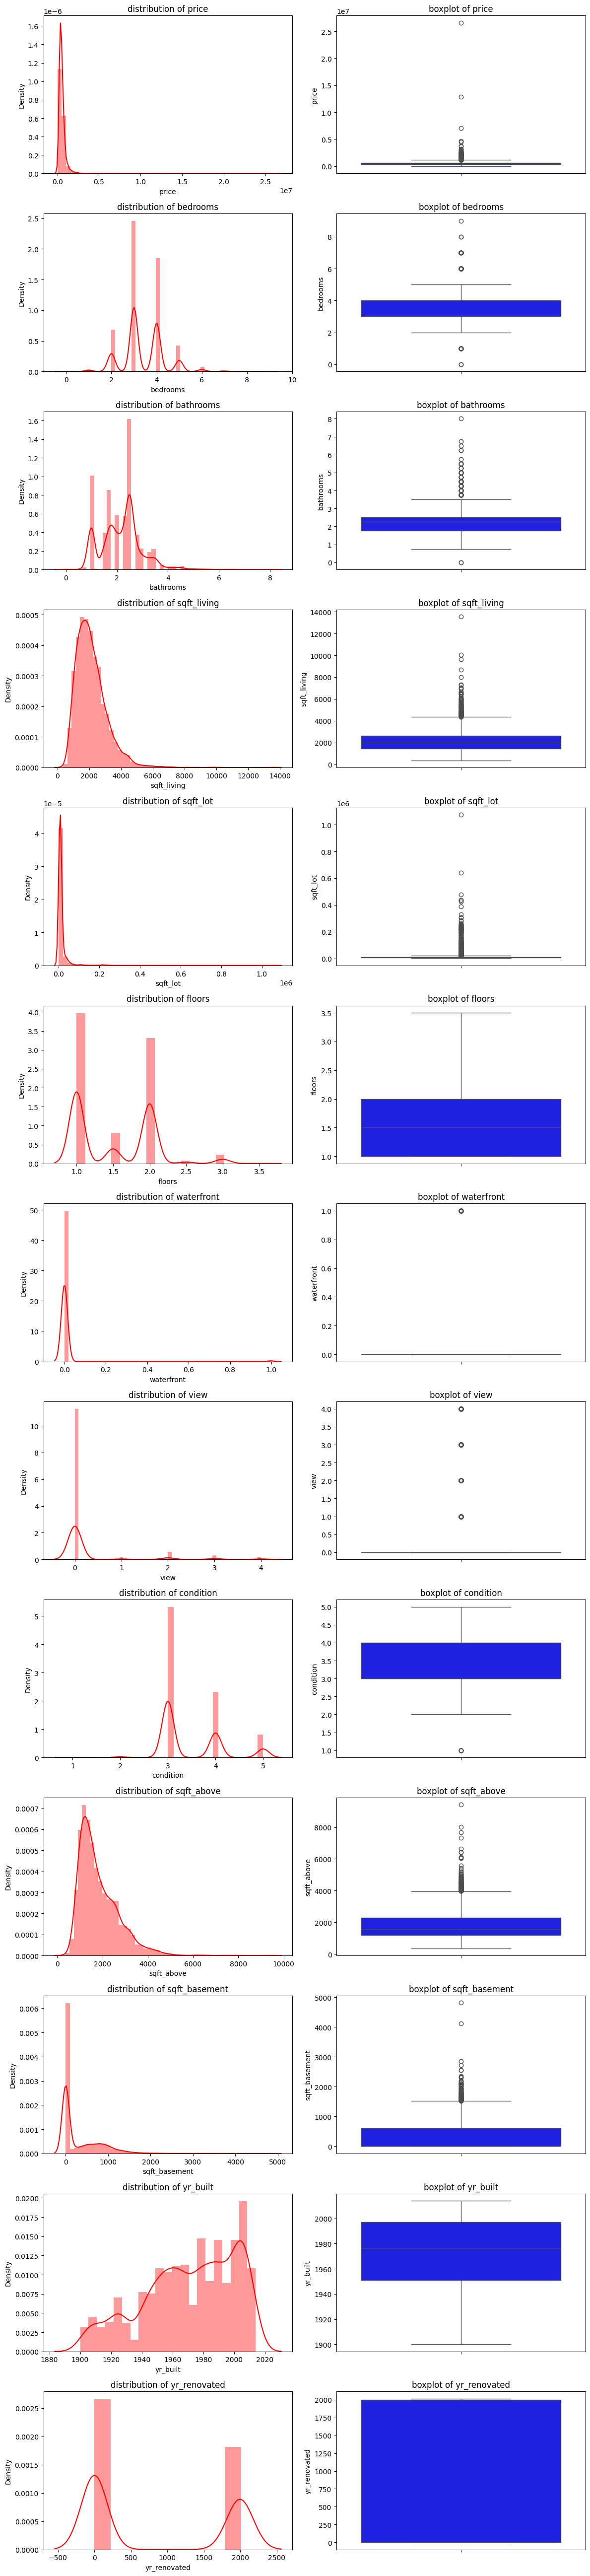

In [ ]:
numeric_data=df.select_dtypes(include=['int64','float64'])
n_cols=len(numeric_data.columns)
n_rows=n_cols
plt.figure(figsize=(12,4*n_rows))
for i,column in enumerate(numeric_data.columns):
  plt.subplot(n_rows,2,2*i+1)
  sns.distplot(df[column],color='red',kde=True)
  plt.title(f'distribution of {column}')
  plt.subplot(n_rows,2,2*i+2)
  sns.boxplot(df[column],color='blue')
  plt.title(f'boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
house_data=df.copy()
house_data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [ ]:
def find_outliers_iqr_multiple_columns(df, columns):
    outliers_summary = {}

    for column in columns: # Fixed: Indentation corrected to one level further
        # Calculate IQR for the column
        percentile25 = df[column].quantile(0.25)
        percentile75 = df[column].quantile(0.75)
        iqr = percentile75 - percentile25
        lower_limit = percentile25 - 1.5 * iqr
        upper_limit = percentile75 + 1.5 * iqr

        # Find lower and upper outliers
        lower_outliers = df[df[column] < lower_limit]
        upper_outliers = df[df[column] > upper_limit]
        # Store results in a dictionary
        outliers_summary[column] = {
            'lower_outliers_count': len(lower_outliers),
            'upper_outliers_count': len(upper_outliers),
            'lower_limit': lower_limit,
            'upper_limit': upper_limit
        }
    return outliers_summary
columns = house_data.select_dtypes(include=['float64', 'int64'])
outliers_summary = find_outliers_iqr_multiple_columns(house_data, columns)
for column, summary in outliers_summary.items():
    print(f"\nColumn: {column}")
    print(f"Lower Outliers Count: {summary['lower_outliers_count']}")
    print(f"Upper Outliers Count: {summary['upper_outliers_count']}")
    print(f"Lower Limit: {summary['lower_limit']}")
    print(f"Upper Limit: {summary['upper_limit']}")


Column: price
Lower Outliers Count: 0
Upper Outliers Count: 240
Lower Limit: -175256.25
Upper Limit: 1153093.75

Column: bedrooms
Lower Outliers Count: 40
Upper Outliers Count: 78
Lower Limit: 1.5
Upper Limit: 5.5

Column: bathrooms
Lower Outliers Count: 2
Upper Outliers Count: 139
Lower Limit: 0.625
Upper Limit: 3.625

Column: sqft_living
Lower Outliers Count: 0
Upper Outliers Count: 129
Lower Limit: -280.0
Upper Limit: 4360.0

Column: sqft_lot
Lower Outliers Count: 0
Upper Outliers Count: 541
Lower Limit: -4000.0
Upper Limit: 20002.0

Column: floors
Lower Outliers Count: 0
Upper Outliers Count: 0
Lower Limit: -0.5
Upper Limit: 3.5

Column: waterfront
Lower Outliers Count: 0
Upper Outliers Count: 33
Lower Limit: 0.0
Upper Limit: 0.0

Column: view
Lower Outliers Count: 0
Upper Outliers Count: 460
Lower Limit: 0.0
Upper Limit: 0.0

Column: condition
Lower Outliers Count: 6
Upper Outliers Count: 0
Lower Limit: 1.5
Upper Limit: 5.5

Column: sqft_above
Lower Outliers Count: 0
Upper Outlie

<ipython-input-36-cd3ea8ae9cce>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='red',kde=True)
<ipython-input-36-cd3ea8ae9cce>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='red',kde=True)
<ipython-input-36-cd3ea8ae9cce>:7: UserWarning: 

`distplot` is a de

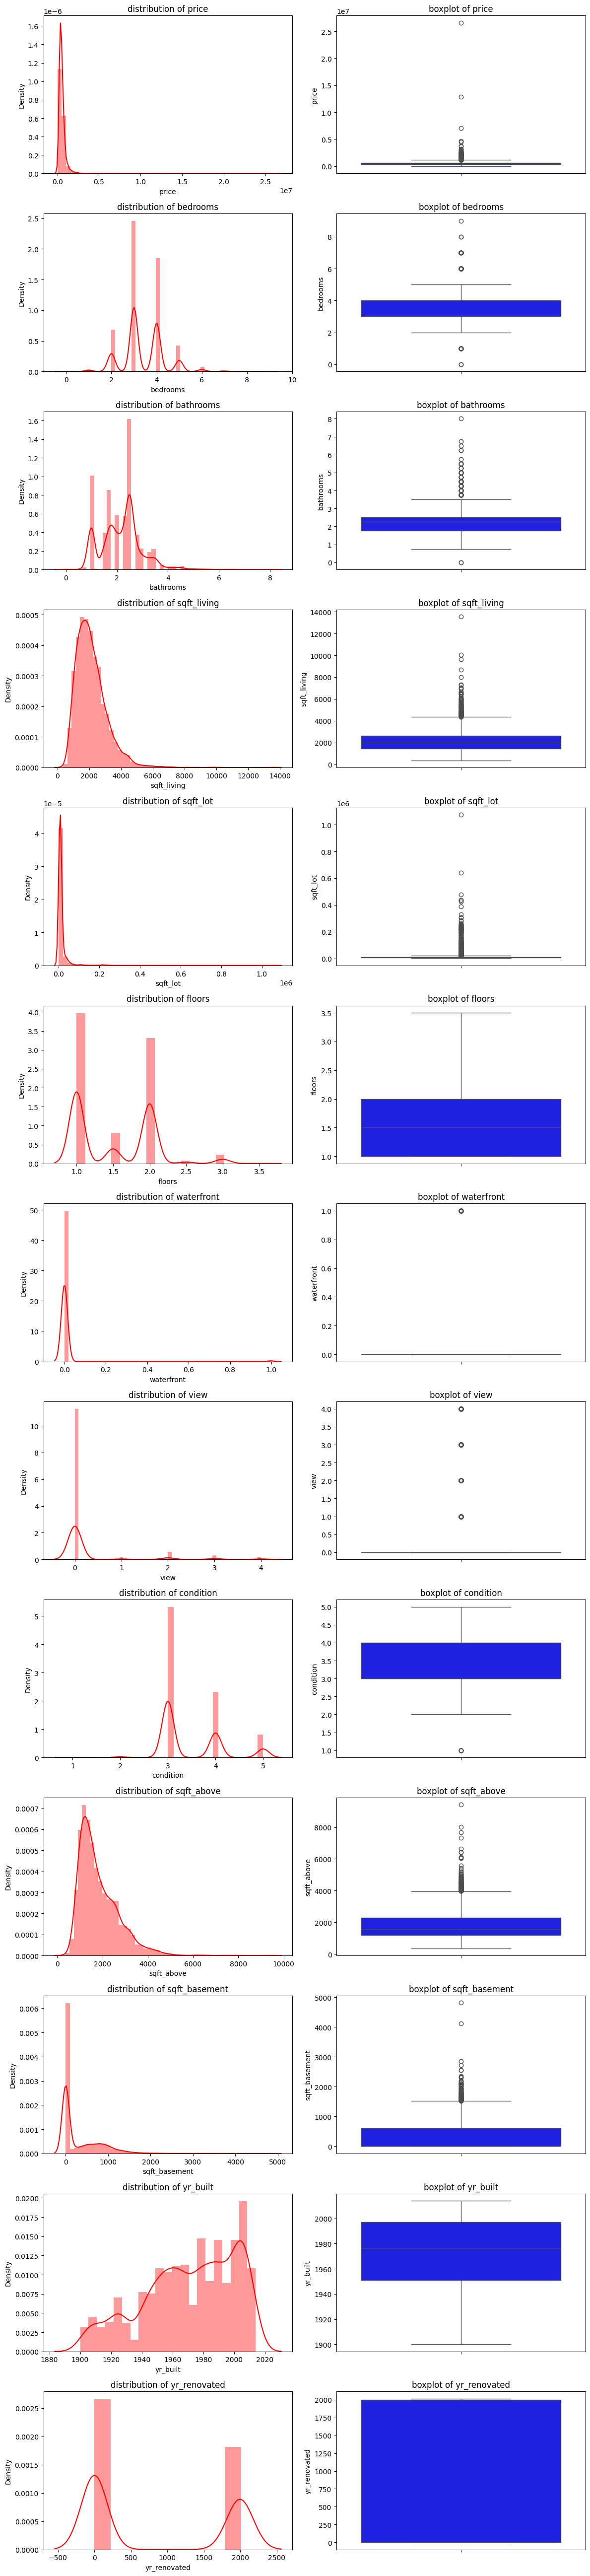

In [ ]:
numeric_data=house_data.select_dtypes(include=['int64','float64'])
n_cols=len(numeric_data.columns)
n_rows=n_cols
plt.figure(figsize=(12,4*n_rows))
for i,column in enumerate(numeric_data.columns):
  plt.subplot(n_rows,2,2*i+1)
  sns.distplot(df[column],color='red',kde=True)
  plt.title(f'distribution of {column}')
  plt.subplot(n_rows,2,2*i+2)
  sns.boxplot(df[column],color='blue')
  plt.title(f'boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [ ]:
house_data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [ ]:
house_data.shape

(4600, 18)

In [ ]:
x=house_data.drop(columns=['price'],axis=1)


In [ ]:
x.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014-05-02 00:00:00       3.0       1.50         1340      7912     1.5   
1  2014-05-02 00:00:00       5.0       2.50         3650      9050     2.0   
2  2014-05-02 00:00:00       3.0       2.00         1930     11947     1.0   
3  2014-05-02 00:00:00       3.0       2.25         2000      8030     1.0   
4  2014-05-02 00:00:00       4.0       2.50         1940     10500     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [ ]:
y=house_data['price']

In [ ]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [ ]:
cat_feature=x.select_dtypes(include='object').columns.tolist()
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [("onehotencoder",oh_transformer,cat_feature)],
    remainder='passthrough')



In [ ]:
x=preprocessor.fit_transform(x)

In [ ]:
x.shape


(4600, 4729)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((3680, 4729), (920, 4729))

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define adjusted_r2 function
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Define evaluate_model function
def evaluate_model(true, predicted, n=None, p=None):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    adj_r2 = adjusted_r2(r2, n, p)
    return mae, rmse, r2, adj_r2



models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(solver='lsqr'),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []
adj_r2_list = []

n_train, p = x_train.shape
n_test = x_test.shape[0]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2, model_train_adj_r2 = evaluate_model(y_train, y_train_pred, n_train, p)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Adjusted R2 Score: {:.4f}".format(model_train_adj_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- Adjusted R2 Score: {:.4f}".format(model_test_adj_r2))

    r2_list.append(model_test_r2)
    adj_r2_list.append(model_test_adj_r2)
    print('=' * 35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 214586.6872
- Mean Absolute Error: 121284.0299
- R2 Score: 0.6759
- Adjusted R2 Score: 2.1355
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1022065.8500
- Mean Absolute Error: 383958.4425
- R2 Score: -0.0243
- Adjusted R2 Score: 1.2471




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2178003935472.7473, tolerance: 52287609387.7351
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 9772.0689
- Mean Absolute Error: 4165.0441
- R2 Score: 0.9993
- Adjusted R2 Score: 1.0024
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1022065.8500
- Mean Absolute Error: 383958.4425
- R2 Score: -0.0243
- Adjusted R2 Score: 1.2471


Ridge
Model performance for Training set
- Root Mean Squared Error: 267591.4648
- Mean Absolute Error: 171148.2491
- R2 Score: 0.4960
- Adjusted R2 Score: 2.7658
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1022065.8500
- Mean Absolute Error: 383958.4425
- R2 Score: -0.0243
- Adjusted R2 Score: 1.2471


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 244136.3431
- Mean Absolute Error: 147546.2576
- R2 Score: 0.5805
- Adjusted R2 Score: 2.4698
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1022065.8500
- Mean Absolut

In [ ]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 4.53


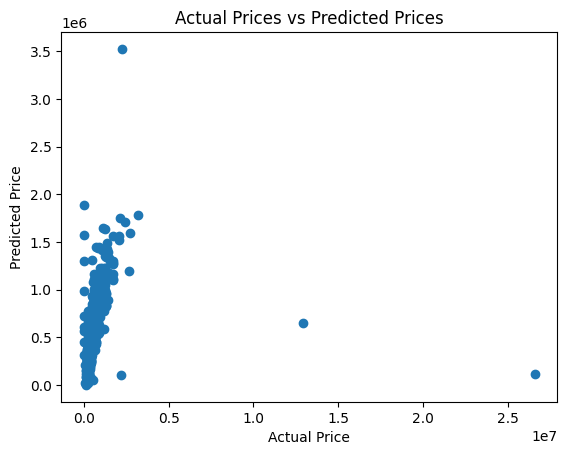

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


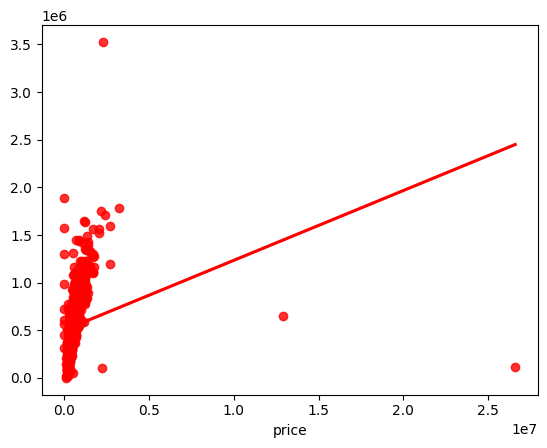

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')
plt.show()

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

Actual Value  Predicted Value    Difference
3683      544000.0     4.379229e+05  1.060771e+05
4411           0.0     3.108251e+05 -3.108251e+05
2584     1712500.0     1.101302e+06  6.111980e+05
69        365000.0     3.478201e+05  1.717986e+04
1844      275000.0     1.293583e+05  1.456417e+05
...            ...              ...           ...
1612      750000.0     5.961338e+05  1.538662e+05
1068      230000.0     5.096382e+05 -2.796382e+05
4350    26590000.0     1.136657e+05  2.647633e+07
3027      687000.0     7.813937e+05 -9.439371e+04
3455      289659.0     3.505919e+05 -6.093286e+04

[920 rows x 3 columns]